In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
# nécessaires pour la réalisation d'une ACP 
from sklearn import preprocessing
from sklearn import decomposition

#from sklearn.preprocessing import OrdinalEncoder

import graphviz


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fastfood-nutrition/fastfood.csv


In [3]:
kentucky_data=pd.read_csv('/kaggle/input/fastfood-nutrition/fastfood.csv')
kentucky_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   515 non-null    object 
 1   item         515 non-null    object 
 2   calories     515 non-null    int64  
 3   cal_fat      515 non-null    int64  
 4   total_fat    515 non-null    int64  
 5   sat_fat      515 non-null    float64
 6   trans_fat    515 non-null    float64
 7   cholesterol  515 non-null    int64  
 8   sodium       515 non-null    int64  
 9   total_carb   515 non-null    int64  
 10  fiber        503 non-null    float64
 11  sugar        515 non-null    int64  
 12  protein      514 non-null    float64
 13  vit_a        301 non-null    float64
 14  vit_c        305 non-null    float64
 15  calcium      305 non-null    float64
 16  salad        515 non-null    object 
dtypes: float64(7), int64(7), object(3)
memory usage: 68.5+ KB


In [4]:
kentucky_data.describe()

,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,503.000000,515.000000,514.000000,301.000000,305.000000,305.000000
mean,530.912621,238.813592,26.590291,8.153398,0.465049,72.456311,1246.737864,45.664078,4.137177,7.262136,27.891051,18.857143,20.170492,24.852459
std,282.436147,166.407510,18.411876,6.418811,0.839644,63.160406,689.954278,24.883342,3.037460,6.761301,17.683921,31.384330,30.592243,25.522073
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,330.000000,120.000000,14.000000,4.000000,0.000000,35.000000,800.000000,28.500000,2.000000,3.000000,16.000000,4.000000,4.000000,8.000000
50%,490.000000,210.000000,23.000000,7.000000,0.000000,60.000000,1110.000000,44.000000,3.000000,6.000000,24.500000,10.000000,10.000000,20.000000
75%,690.000000,310.000000,35.000000,11.000000,1.000000,95.000000,1550.000000,57.000000,5.000000,9.000000,36.000000,20.000000,30.000000,30.000000
max,2430.000000,1270.000000,141.000000,47.000000,8.000000,805.000000,6080.000000,156.000000,17.000000,87.000000,186.000000,180.000000,400.000000,290.000000


In [4]:
kentucky_data.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


In [5]:
kentucky_data.isnull().sum()

restaurant       0
item             0
calories         0
cal_fat          0
total_fat        0
sat_fat          0
trans_fat        0
cholesterol      0
sodium           0
total_carb       0
fiber           12
sugar            0
protein          1
vit_a          214
vit_c          210
calcium        210
salad            0
dtype: int64

In [5]:
# Vu le nombre de données nulles sur les colonnes vit_a vit_c et calcium, on décide de ne pas prendre en compte ces colonnes dans notre analyse
kentucky_filtered=['calories','cal_fat','total_fat','sat_fat','trans_fat','cholesterol','sodium','total_carb','fiber','sugar','protein']
kentucky_data_clean=kentucky_data[kentucky_filtered].dropna(axis=0).reset_index(drop=True)
kentucky_data_clean.isnull().sum()
kentucky_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   calories     503 non-null    int64  
 1   cal_fat      503 non-null    int64  
 2   total_fat    503 non-null    int64  
 3   sat_fat      503 non-null    float64
 4   trans_fat    503 non-null    float64
 5   cholesterol  503 non-null    int64  
 6   sodium       503 non-null    int64  
 7   total_carb   503 non-null    int64  
 8   fiber        503 non-null    float64
 9   sugar        503 non-null    int64  
 10  protein      503 non-null    float64
dtypes: float64(4), int64(7)
memory usage: 43.4 KB


<AxesSubplot: xlabel='calories', ylabel='restaurant'>

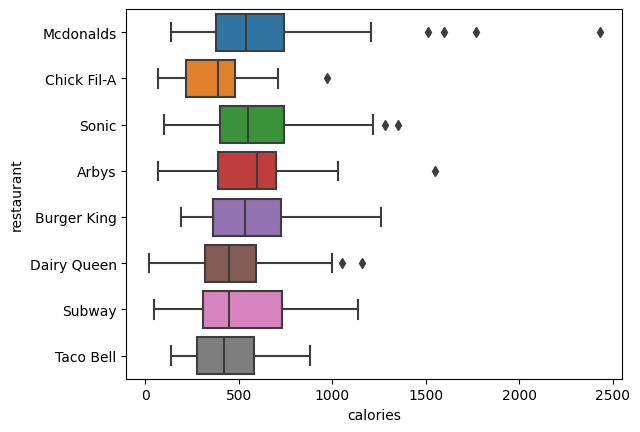

In [6]:
#on observe la distribution de la variable 'total_fat' par restaurant
sns.boxplot(x=kentucky_data_clean['calories'],y=kentucky_data['restaurant'])

<AxesSubplot: title={'center': 'Calories/TotalFat'}, xlabel='total_fat', ylabel='calories'>

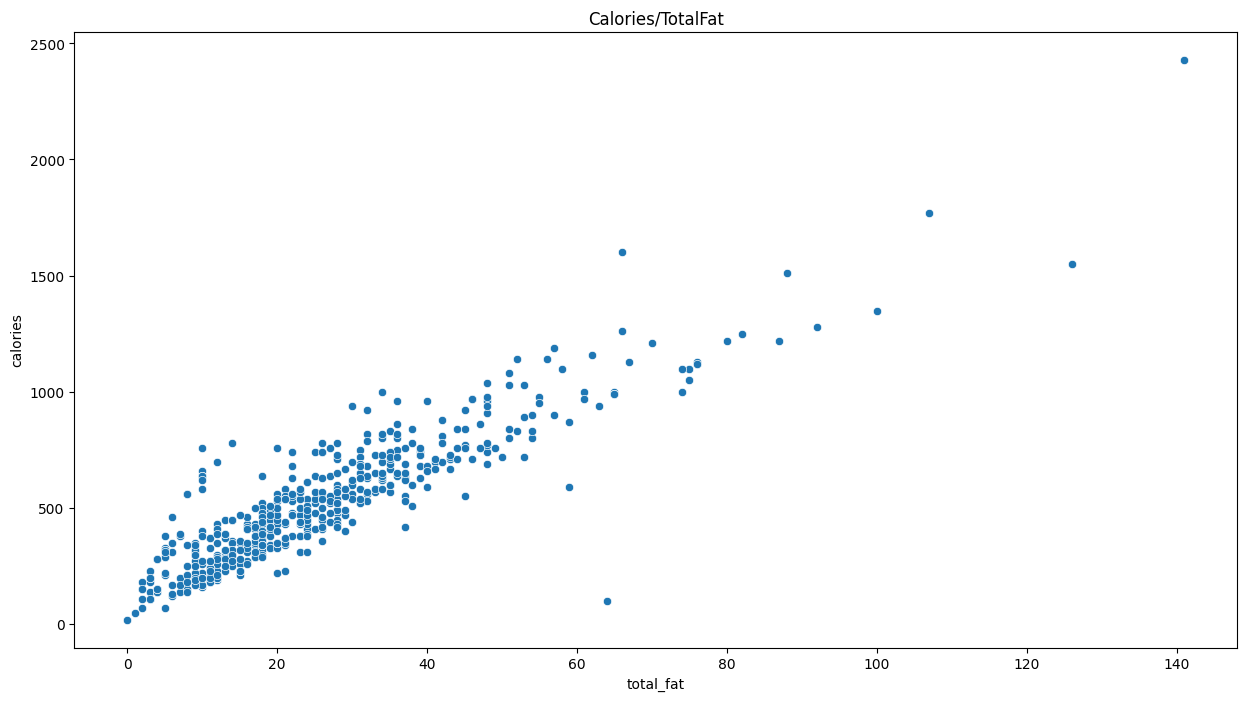

In [7]:
# On s'interesse maintenant à la corrélation entre la quantité de graisse contenue dans un aliment 'total_fat' et les calories de celui-ci 
plt.figure(figsize=(15,8))
plt.title("Calories/TotalFat")
sns.scatterplot(y=kentucky_data['calories'],x=kentucky_data['total_fat'])

In [9]:
# A partir de ce graphique on peut faire l'hypothèse d'un corrélation entre 'total_fat' et 'calories', ce qui parait logique
# Cependant existe-t-il une correlation entre le nombre de calories et d'autres nutriments ?  Et lesquels sont les plus pertinents pour construire un modèle prévisionnel ? 

In [10]:
#Objectif : à partir de la quantité de certains nutriments d'un aliment, prédire le nombre de calories que cet aliment aura

In [8]:
# Réalisation d'une ACP ( mooc open classroom : https://openclassrooms.com/fr/courses/4379436-explorez-vos-donnees-avec-des-algorithmes-non-supervises)
#standardisation/preprocess
std_scale = preprocessing.StandardScaler().fit(kentucky_data_clean)
kentucky_data_clean_scaled = std_scale.transform(kentucky_data_clean)

[[-0.51609814 -1.06706706 -1.05644808 ... -0.37475684  0.55970448
   0.52497206]
 [ 1.1273754   1.07724967  1.04808018 ... -0.704307    1.59041551
   1.03354225]
 [ 2.16347828  2.24130732  2.26649128 ... -0.37475684  1.59041551
   2.38972942]
 ...
 [ 0.91300929  0.89345109  0.88193321 ...  2.26164444 -0.02927325
  -0.09661373]
 [ 0.69864317  0.52585394  0.49425695 ...  1.27299396  0.11797119
   0.24243306]
 [ 0.69864317  0.52585394  0.54963927 ...  1.27299396  0.11797119
   0.01640187]]


In [16]:
#On choisit ici 2 composantes
pca = decomposition.PCA(n_components=2)
pca.fit(kentucky_data_clean_scaled)

PCA(n_components=2)

In [17]:
# On affiche le pourcentage de variance expliquée par chacune des composantes ainsi que la somme des 2 
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.59347963 0.18513064]
0.7786102749786503


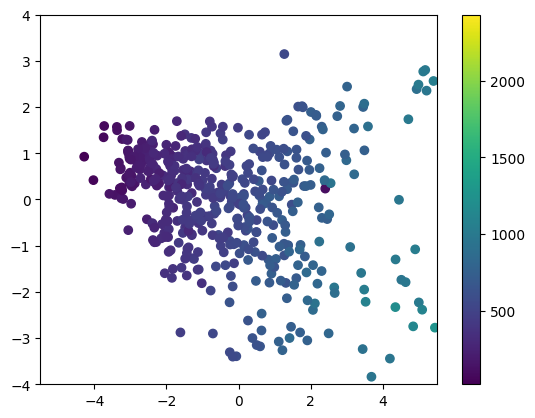

In [23]:
# projeter X sur les composantes principales
X_projected = pca.transform(kentucky_data_clean_scaled)

# afficher chaque observation
plt.scatter(X_projected[:, 0], X_projected[:, 1],
    # colorer en utilisant la variable 'calories'
    c=kentucky_data_clean.calories)

plt.xlim([-5.5, 5.5])
plt.ylim([-4, 4])
plt.colorbar()

(-0.7, 0.7)

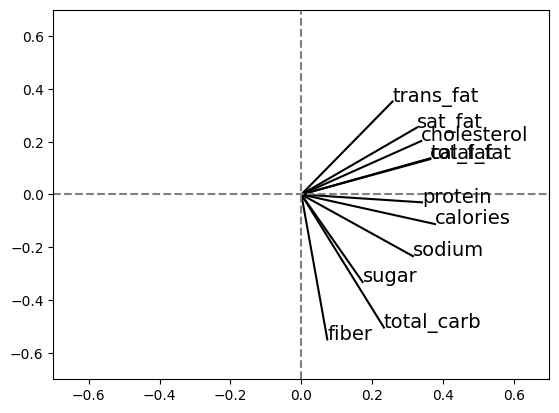

In [25]:
# Réalisation d'un cercle de corrélation
pcs = pca.components_

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, kentucky_data_clean.columns[i], fontsize='14')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim([-0.7, 0.7])
plt.ylim([-0.7, 0.7])

In [ ]:
# On observe que les éléments de graisses sont très corrélées  entre elles, que les proteines et le sodium sont les 2 composantes
#les plus corrélées aux calories

In [11]:
# Sans cercle de correlation, on peut s'interesser aux corrélations de la variable 'calories' en calculant le coeff de correlation linéaire
# Calculons le coeff de  corrélation linéaire 
print('(Statistic, p-value)')
for col in kentucky_data_clean:
    print(col)
    print(stats.pearsonr(kentucky_data_clean[col],kentucky_data_clean['calories']))

(Statistic, p-value)
calories
(0.9999999999999999, 0.0)
cal_fat
(0.8986715808097981, 1.929158534957273e-181)
total_fat
(0.8974644710423186, 3.1997065607309346e-180)
sat_fat
(0.7284118838730362, 2.593865682231481e-84)
trans_fat
(0.5177450341293176, 7.699845763703248e-36)
cholesterol
(0.7549276193119988, 7.558253777249714e-94)
sodium
(0.821537478585987, 2.44928207963381e-124)
total_carb
(0.7179097405519294, 7.668825733581722e-81)
fiber
(0.2870313838263437, 5.382151701582081e-11)
sugar
(0.43426910496327153, 1.4967937480577272e-24)
protein
(0.8311056197443834, 9.100715168923962e-130)


In [12]:
# On peut alors définir la corrélation de certains nutriments et déterminer lesquels seront les plus pertinents pour construire un modèle prévisonnel 

In [13]:
# Creating features , on gardera celle dont le coeff de Pearson est supérieur à 0.75
features = ["cal_fat","total_fat","cholesterol","protein"]
X = kentucky_data_clean[features]
X.shape

(503, 4)

In [14]:
# target
y = kentucky_data_clean.calories

In [15]:
# Split into validation and training data, on garde 80 % de données pour l'entrainement et 20 % pour les tests 
train_X, valid_X, train_y, valid_y = train_test_split(X, y,train_size=0.8,test_size=0.2, random_state=0)

In [16]:
#Bien que la régression linéaire semble être tout indiquée pour ce genre de problème, on testera ici 3 modèles supervisés :
# La régression linéaire
# Arbre de décision
# Le random Forest

In [17]:
# On effectue une régression linéaire
kentucky_model_regr = linear_model.LinearRegression()
kentucky_model_regr.fit(train_X, train_y)
pred_regr= kentucky_model_regr.predict(valid_X)
print('Calories prédites par régression linéaire')
print(kentucky_model_regr.predict(valid_X.head()))

Calories prédites par régression linéaire
[ 629.37309928 1163.03800924  440.54620714  493.87421899  349.02847162]


In [18]:
kentucky_model_tree= DecisionTreeRegressor(random_state=0)
kentucky_model_tree.fit(train_X,train_y)
pred_tree = kentucky_model_tree.predict(valid_X)

print('Predictions ces 5 aliments:')
print(X.head())
print('Calories prédites par DecisionTree :')
print(kentucky_model_tree.predict(valid_X.head()))

Predictions ces 5 aliments:
   cal_fat  total_fat  cholesterol  protein
0       60          7           95     37.0
1      410         45          130     46.0
2      600         67          220     70.0
3      280         31          155     55.0
4      410         45          120     46.0
Calories prédites par DecisionTree :
[ 640. 1130.  370.  550.  410.]


[Text(0.6627395135208853, 0.9705882352941176, 'x[1] <= 29.5\nsquared_error = 78188.013\nsamples = 402\nvalue = 518.408'),
 Text(0.39653186370012466, 0.9117647058823529, 'x[3] <= 23.5\nsquared_error = 22900.124\nsamples = 271\nvalue = 382.694'),
 Text(0.187760579021197, 0.8529411764705882, 'x[0] <= 145.0\nsquared_error = 12767.238\nsamples = 182\nvalue = 317.473'),
 Text(0.06442390118453865, 0.7941176470588235, 'x[0] <= 32.5\nsquared_error = 8329.258\nsamples = 102\nvalue = 253.725'),
 Text(0.017144638403990026, 0.7352941176470589, 'x[0] <= 19.0\nsquared_error = 4001.384\nsamples = 17\nvalue = 144.706'),
 Text(0.004987531172069825, 0.6764705882352942, 'x[3] <= 2.0\nsquared_error = 422.222\nsamples = 3\nvalue = 46.667'),
 Text(0.0024937655860349127, 0.6176470588235294, 'squared_error = 0.0\nsamples = 1\nvalue = 20.0'),
 Text(0.007481296758104738, 0.6176470588235294, 'x[3] <= 8.0\nsquared_error = 100.0\nsamples = 2\nvalue = 60.0'),
 Text(0.004987531172069825, 0.5588235294117647, 'squared_

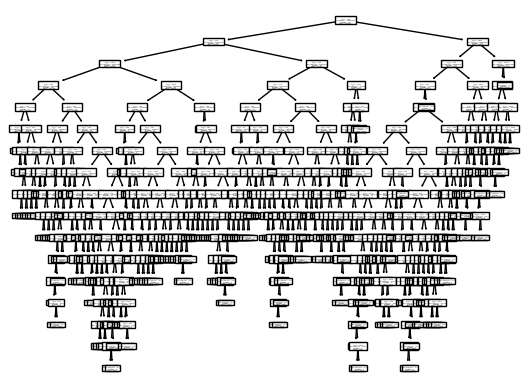

In [19]:
#Visualisation de l'arbre
tree.plot_tree(kentucky_model_tree.fit(train_X,train_y))
# scroll down pour voir l'arbre  

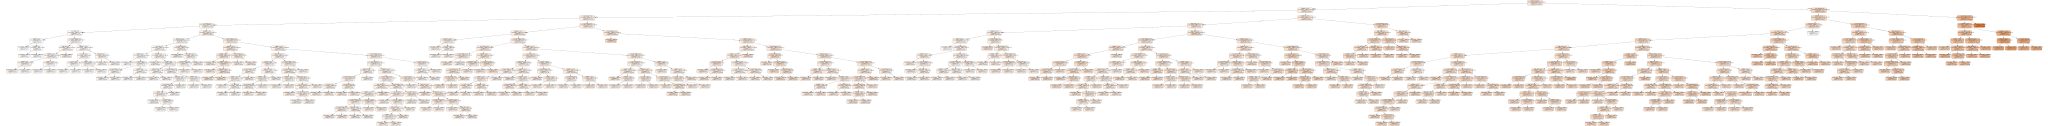

In [20]:
# Visulisation plus "digeste" mais moins globale avec le module graphiz
dot_data = tree.export_graphviz(kentucky_model_tree.fit(train_X,train_y), out_file=None,feature_names=features,class_names=train_y,filled=True, rounded=True,  special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [21]:
kentucky_model_forest = RandomForestRegressor(random_state=1)
kentucky_model_forest.fit(train_X, train_y)
pred_forest = kentucky_model_forest.predict(valid_X)
print(kentucky_model_forest.predict(valid_X.head()))

[ 621.4 1156.   465.3  511.5  358.1]


In [22]:
#Comparaison des résultats ( aperçu de la head)
print('Calories prédites par DecisionTree :')
print(kentucky_model_tree.predict(valid_X.head()))
print('Calories prédites par régression linéaire')
print(kentucky_model_regr.predict(valid_X.head()))
print('Calories prédites par Random forest')
print(kentucky_model_forest.predict(valid_X.head()))
print('Calories du set de validation')
print(valid_y.head())

Calories prédites par DecisionTree :
[ 640. 1130.  370.  550.  410.]
Calories prédites par régression linéaire
[ 629.37309928 1163.03800924  440.54620714  493.87421899  349.02847162]
Calories prédites par Random forest
[ 621.4 1156.   465.3  511.5  358.1]
Calories du set de validation
90      640
97     1120
475     540
340     470
395     420
Name: calories, dtype: int64


In [23]:
# On calcule le MAE ( mean average error) pour chaque model
mae_regr= mean_absolute_error(valid_y,pred_regr)
mae_tree=mean_absolute_error(valid_y,pred_tree)
mae_forest=mean_absolute_error(valid_y,pred_forest)

print('MAE RegressionL:',mae_regr)
print('MAE Tree:',mae_tree)
print('MAE Forest:',mae_forest)

MAE RegressionL: 50.61793958273806
MAE Tree: 68.36633663366337
MAE Forest: 58.39003300330033


In [24]:
#On constate que le modèle de régression linéaire est le plus adapté ( et de loin!)
#Cependant on peut chercher à voir si en ajustant au mieux les modèles de foret et d'arbres, on peut diminuer assez la MAE pour que ces modèles soient compétitifs 

In [25]:
#Amelioration du modèle d'arbre : 
#On chercher à trouver le nombre optimal de feuille:
#a-on définit une fonction pour pouvoir boucler facilement 
def tree_score_dataset(max_leaf_nodes, valid_X, train_y, valid_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds = model.predict(valid_X)
    return mean_absolute_error(valid_y, preds)
#b-on effectue la boucle
mae_tree_opt=[]
i=150
while i <= 160:
    i+=1
    mae_tree_opt.append(tree_score_dataset(i, valid_X, train_y, valid_y))
optimal_tree_mae=min(mae_tree_opt)
optimal_tree_mae_index=mae_tree_opt.index(min(mae_tree_opt))+151
print(optimal_tree_mae,optimal_tree_mae_index)

68.47936387045297 157


In [26]:
# MAE supérieure à celle trouvée par défaut, problème de compréhension de ma part 

In [27]:
#Amelioration du modèle de foret :
#Même principe que pour l'arbre, on va définir une fonction et boucler dessus:
    #En paramétrant uniquement la profondeur
def forest_score_depth(max_depth,train_X,valid_X, train_y, valid_y):
    model = RandomForestRegressor(n_estimators=100,max_depth=max_depth,random_state=0)
    model.fit(train_X, train_y)
    preds = model.predict(valid_X)
    return mean_absolute_error(valid_y, preds)
mae_forest_opt_depth=[]
i=1
while i<=30:
    i+=1
    mae_forest_opt_depth.append(forest_score_depth(i,train_X,valid_X, train_y, valid_y))
optimal_forest_mae_depth=min(mae_forest_opt_depth)
optimal_forest_mae_depth_index=mae_forest_opt_depth.index(min(mae_forest_opt_depth))+3 # +3 compte tenu de l'index qui commence à 0 et du i qui commence à 2 
print(optimal_forest_mae_depth,optimal_forest_mae_depth_index)

57.93001750477841 14


In [28]:
def forest_score_estimators(n_estimators,train_X,valid_X, train_y, valid_y):
    model = RandomForestRegressor(n_estimators=n_estimators,max_depth=14,random_state=0)
    model.fit(train_X, train_y)
    preds = model.predict(valid_X)
    return mean_absolute_error(valid_y, preds)
mae_forest_opt_estim=[]
j=1
while j<30:
    j+=1
    mae_forest_opt_estim.append(forest_score_estimators(j,train_X,valid_X, train_y, valid_y))
optimal_forest_mae_estim=min(mae_forest_opt_estim)
optimal_forest_mae_estim_index=mae_forest_opt_estim.index(min(mae_forest_opt_estim))+1
print(optimal_forest_mae_estim,optimal_forest_mae_estim_index)

57.193120105661365 17


In [29]:
mae_forest_diff=mae_forest-optimal_forest_mae_estim
print('En choissant une profondeur max de 14  et un nombre d\'arbre de 17, la MAE est réduite de :')
print(mae_forest_diff)
print('Soit une amélioration de',(mae_forest_diff/mae_forest)*100,'%')

En choissant une profondeur max de 14  et un nombre d'arbre de 17, la MAE est réduite de :
1.196912897638967
Soit une amélioration de 2.049858231063707 %


In [30]:
#Mais cela reste signicativement supérieur à la MAE obtenue par Régression Linéaire, on gardera donc le modèle de régression linéaire

In [31]:
# Preprocessing : dealing with categorical data via Pipelines

In [32]:
# On enlève les entrées qui n'ont pas de cible présentes, (la cible sera donc la colonne 'restaurant') et on sépare la cible des valeurs qui aident à prédire
kentucky_data= pd.read_csv('/kaggle/input/fastfood-nutrition/fastfood.csv')

In [33]:
#Copie des données de base
X_full= kentucky_data.copy()
kentucky_data.dropna(axis=0, subset=['restaurant'])
#définition de la target et séparation de la target de la 'variable aléatoire'
y = X_full.restaurant
X_full.drop(['restaurant'], axis=1, inplace=True)

In [34]:
#Classique, séparation des données d'entrainement aux données de validation
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X_full, y, train_size=0.8, test_size=0.2,random_state=0)

In [35]:
#Selection des données "categoriques" avec une cardinalité inférieure à 10 ( ici salad)
categorical_cols = [cname for cname in X_train_full.columns if
                    X_train_full[cname].nunique() < 10 and 
                    X_train_full[cname].dtype == "object"]

In [36]:
#Selectionne les données numériques
numerical_cols = [cname for cname in X_train_full.columns if 
                X_train_full[cname].dtype in ['int64', 'float64']]

In [38]:
#Garde les données sélectionnées seulement 
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [39]:
X_train.shape

(412, 15)

In [40]:
X_train.head()

,salad,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
298,Other,380,170,19,9.0,0.0,100,1540,11,3.0,6,42.0,NaN,NaN,NaN
471,Other,490,250,28,10.0,1.0,55,880,40,5.0,5,20.0,NaN,NaN,NaN
299,Other,150,20,2,0.5,0.0,40,730,10,3.0,6,23.0,NaN,NaN,NaN
71,Other,440,171,19,4.0,0.0,60,1350,40,2.0,5,28.0,2.0,4.0,15.0
170,Other,740,320,35,13.0,1.0,125,2050,62,4.0,17,43.0,NaN,NaN,NaN


In [ ]:
# On passe au preprocess
#Etape 1 : définir les transofmrer des différents types de données

In [ ]:
#  cas des données numériques:  straty='constant' signifie qu'on va remplacer les données manquantes par la fill_value, 'mean' par la moyenne
numerical_transformer = SimpleImputer(strategy='mean')

In [ ]:
# cas des données catégoriques : gestion avec Pipeline
# strategy='most_frequent' fait que l'on va remplacer les données manquantes par la valeur la plus fréquente de la plage
# handle_unknown='ignore', les colonnes OneHot seront remplies par des 0 pour cette entrée 
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
#Etape 2: On joint les transformers dans un preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [ ]:
# Définition du modele: ( encore à choisir une technique de clustering : k-moyenne, k-nn )
model = 

In [ ]:
# Preprocess et modeling dans la pipeline
final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])

In [ ]:
final_pipeline.fit(X_train, y_train)
prediction= final_pipeline.predict(X_valid)

In [ ]:
print(mean_absolute_error(y_valid, prediction))

In [41]:
# Il reste les données nulles
X_train.isnull().sum()

salad            0
calories         0
cal_fat          0
total_fat        0
sat_fat          0
trans_fat        0
cholesterol      0
sodium           0
total_carb       0
fiber            9
sugar            0
protein          0
vit_a          174
vit_c          171
calcium        171
dtype: int64

In [42]:
# [EN COURS] Au lieu de les drop, on va ici remplacer les données manquantes par la moyenne
# Imputation des données manquantes
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

# On remet les colonnes imputées
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'Other'

In [ ]:
X_train.isnull().sum()